## Review on Neural Networks

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
faces = fetch_lfw_people(min_faces_per_person=70)

### Let's see what is in this face dataset

In [5]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [6]:
#What main items are in the data and show the first data for each item
for key, value in faces.items():
  print (key, value[0])

data [253.66667  254.33333  253.66667  ...  87.        88.        86.666664]
images [[253.66667  254.33333  253.66667  ...  56.333332  46.666668  39.      ]
 [254.       254.       253.       ...  58.        48.333332  40.666668]
 [250.       247.       243.33333  ...  56.666668  48.333332  42.333332]
 ...
 [ 73.333336  58.        39.666668 ...  94.333336  91.333336  86.666664]
 [ 65.666664  51.666668  37.333332 ...  90.666664  90.333336  85.333336]
 [ 60.        50.        37.666668 ...  87.        88.        86.666664]]
target 5
target_names Ariel Sharon
DESCR .


In [7]:
#How many data are there and how many features are in each data?
print(faces.target.shape)
features = faces.images.shape[1] * faces.images.shape[2]
print(features)


(1288,)
2914


In [8]:
#What's the dimension of its first sample facial image?
faces.images[0].shape

(62, 47)

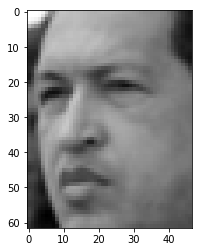

In [9]:
#Let's see what face does the first image data show
from matplotlib import pyplot as plt
plt.imshow(faces.images[0] , cmap=plt.cm.gray)

In [10]:
#Label for the first data
faces.target[0]

5

In [11]:
#That label corrsponds to whose name?
faces.target_names[5]

'Hugo Chavez'

In [12]:
#How many different presons are in the face dataset?
import pandas as pd
pd.Series(faces.target).unique()

array([5, 6, 3, 1, 0, 4, 2])

In [13]:
#How many different presons are in the face dataset?
pd.Series(faces.target_names).unique()

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype=object)

### Predicting facial images

In [0]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2)

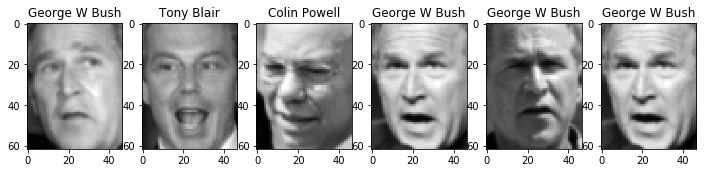

In [15]:
# # Pick 6 random digit data to display
viz_data = np.random.choice(range(X_train.shape[0]), 6)
fig = plt.figure(figsize=(12,12))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_train[img].reshape(62, 47), cmap=plt.cm.gray)
    plt.title(faces.target_names[y_train[img]])

In [0]:
# normalizing the dataset 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Logistic Regression approach

In [17]:
#Let's see how good is Logistic Regression
#Use X_train, y_train to train the model then find out the prediction score on the X_test, y_test data.
%%time
logit = LogisticRegression()
logit.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 26.3 s, sys: 17.3 ms, total: 26.3 s
Wall time: 26.4 s


In [18]:
score = logit.score(X_test, y_test)

print(score)

0.8682170542635659


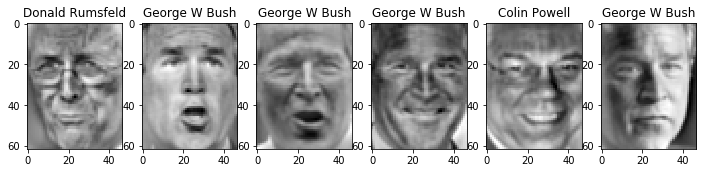

In [19]:
y_predict = logit.predict(X_test)
# let's visualize the predicted result by printing 6 random facial images on X_test

viz_data = np.random.choice(range(X_test.shape[0]), 6)
fig = plt.figure(figsize=(12,12))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_test[img].reshape(62, 47), cmap=plt.cm.gray)
    plt.title(faces.target_names[y_predict[img]])

### Feedforward Neural Network approach

In [21]:
#Let's review how MLPClassifier got trained and do prediction
%%time
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2)
#create a model out of MLPClassifier class with one hidden layer of 8000 neurons
#then train it with X_train, y_train, followed by prediction on X_test, y_test 
#print out the prediction score in with 2 decimal points

CPU times: user 7.1 ms, sys: 804 µs, total: 7.9 ms
Wall time: 13.1 ms


In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier((8000,),activation='logistic')
mlp.fit(X_train,y_train)
score = mlp.score(X_test,y_test)
print(score)

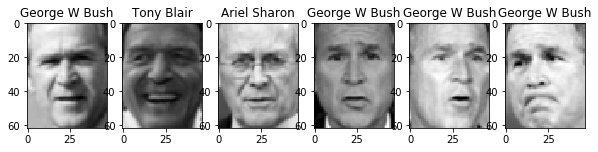

In [0]:
y_predict = mlp.predict(X_test)
# let's visualize the predicted result
# by printing 6 randomly chosen X_test images and their corresponding names.


### Feedforward NN with Keras approach

In [0]:
y_train_c = to_categorical(y_train, num_classes=7)
y_test_c = to_categorical(y_test, num_classes=7)
print('original y_train size:',y_train.shape,'transformed y_train shape:', y_train_c.shape)

original y_train size: (1030,) transformed y_train shape: (1030, 7)


In [0]:
# create a feedforward model
model = Sequential()
input_size =X_train.shape[1]
# model.add(Dense(17, input_shape=(input_size,), init='uniform',activation='relu'))
model.add(Dense(8000, input_dim=input_size, init='uniform', activation='relu'))
model.add(Dense(7, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8000, input_dim=2914, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="sigmoid", kernel_initializer="uniform")`
  """


In [0]:
# Fit the model
history = model.fit(X_train, y_train_c, validation_data=(X_test, y_test_c),epochs=30, batch_size=5,  verbose=0);

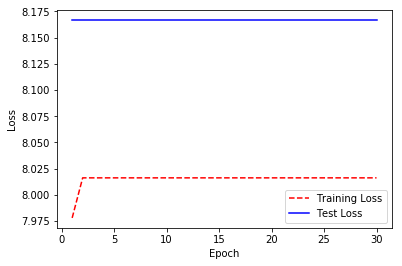

In [0]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [0]:
predictions = model.predict(X_test)
score =model.evaluate(X_test, y_test_c, batch_size=20,  verbose=0)
print('prediction score: %.2f%%' % (score[1]*100)  )

prediction score: 40.31%


In [0]:
# change the output back to one vector column
predictions_in_one = (np.argmax(predictions,axis=1))
print('original prediction shape:',predictions.shape,'\ntransformed prediction shape:', predictions_in_one.shape)

original prediction shape: (258, 7) 
transformed prediction shape: (258,)


In [0]:
# let's visualize the predicted result
viz_data = np.random.choice(range(X_test.shape[0]), 6)
fig = plt.figure(figsize=(13, 13))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_test[img].reshape(62, 47), cmap=plt.cm.gray)
    plt.title(faces.target_names[predictions_in_one[img]])

### CNN approach

In [0]:
# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D,MaxPooling1D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import optimizers

In [0]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, stratify=faces.target, test_size=0.2)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 62, 47).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 62, 47).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
#One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

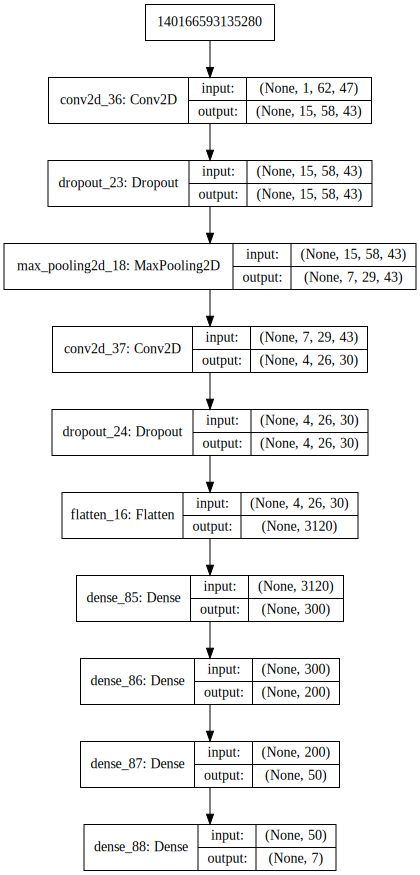

In [0]:
# create model
model = Sequential()
model.add(Conv2D(15, kernel_size=(5, 5), activation='relu',data_format = 'channels_first',
               input_shape=X_train.shape[1:]))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(30, (4, 4), activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))#try adding few more Dense layers
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Visualize network architecture
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [0]:
# Fit the model
%%time
history = model.fit(X_train, y_train_c, validation_data=(X_test, y_test_c),epochs=5, verbose=0);

CPU times: user 46 s, sys: 805 ms, total: 46.8 s
Wall time: 26.4 s


In [0]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 41.09%


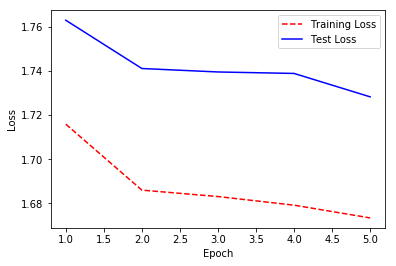

In [0]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

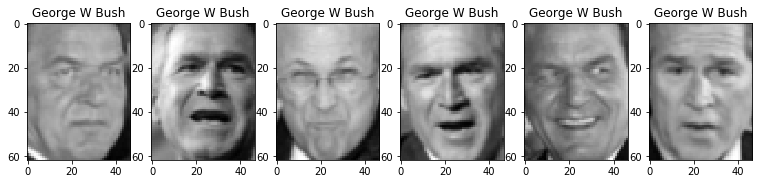

In [0]:
y_predict = model.predict(X_test)
# let's visualize the predicted result
viz_data = np.random.choice(range(X_test.shape[0]), 6)
fig = plt.figure(figsize=(13, 13))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_test[img].reshape(62, 47), cmap=plt.cm.gray)
    plt.title(faces.target_names[np.argmax(y_predict[img])])